# __Machine Learning Project Task Document__
## __Project Title: IPL Score Prediction__
## ***1. Project Overview***
>This project aims to predict the total score of a cricket team at the end of their innings during an IPL (Indian Premier League) match. The model is built using historical data from IPL seasons 1 to 9 (2008-2016) and tested on data from season 10 (2017). The model uses various machine learning algorithms to predict the score based on input features such as the batting and bowling teams, overs, runs, wickets, and other match statistics.

## ***2. Data Understanding***
### _2.1 Data Collection_<br>
>The dataset used for this project is an IPL dataset (ipl.csv) containing match statistics for each ball bowled in a match. The dataset includes:<br>
●	Batting team<br>
●	Bowling team<br>
●	Overs (current over in the match)<br>
●	Runs scored in that over<br>
●	Wickets taken in that over<br>
●	Runs in last 5 overs<br>
●	Wickets in last 5 overs<br>
●	Total score of the batting team at the end of the innings<br>
●	Date of the match<br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### _2.2 Data Exploration_<br>
>●	The dataset contains multiple columns such as match ID, venue, batsman, bowler, striker, non-striker, etc.<br>
●	We perform basic data exploration, such as checking the shape of the dataset, data types, and the first few records, to understand the structure of the data.


In [23]:
df=pd.read_csv("C:/Users/TestFix123/OneDrive/Desktop/CUVETTE_FINAL_MODULE_PROJECTS/ML/ipl.csv")

In [24]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [25]:
df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [26]:
df.shape

(76014, 15)

In [27]:
df.size

1140210

In [28]:
df.ndim

2

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [30]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


## ***3. Data Preprocessing***
### _3.1 Data Cleaning_
>●	__Removing Unwanted Columns:__ Columns that are not relevant for predicting the score, such as match ID, venue, batsman, bowler, striker, and non-striker, are removed.

In [32]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [34]:
df.drop(columns=['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], inplace=True)

In [35]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [36]:
df.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222


>●   __Filtering Consistent Teams:__ Only matches involving consistent teams (e.g., Chennai Super Kings, Mumbai Indians, etc.) are retained.

In [46]:
print(df['bat_team'].value_counts())

bat_team
Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: count, dtype: int64


In [47]:
print(df['bowl_team'].value_counts())

bowl_team
Delhi Daredevils               10245
Royal Challengers Bangalore     9661
Mumbai Indians                  9271
Kolkata Knight Riders           9211
Kings XI Punjab                 8405
Rajasthan Royals                7773
Chennai Super Kings             6497
Deccan Chargers                 3984
Sunrisers Hyderabad             3589
Pune Warriors                   3083
Gujarat Lions                   1970
Rising Pune Supergiant           962
Kochi Tuskers Kerala             736
Rising Pune Supergiants          627
Name: count, dtype: int64


In [48]:
consistent_teams = ['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings',
                    'Rajasthan Royals', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad', 'Gujarat Lions']
df = df[df['bat_team'].isin(consistent_teams) & df['bowl_team'].isin(consistent_teams)]

In [49]:
df['bat_team'].value_counts()

bat_team
Mumbai Indians                 8713
Kings XI Punjab                8379
Chennai Super Kings            7536
Royal Challengers Bangalore    7333
Kolkata Knight Riders          6669
Rajasthan Royals               6038
Delhi Daredevils               6022
Sunrisers Hyderabad            4722
Gujarat Lions                  1605
Name: count, dtype: int64

In [52]:
df.loc[:, ['bat_team', 'bowl_team']] = df[['bat_team', 'bowl_team']].replace({'Delhi Daredevils': 'Delhi Capitals',
                                                                              'Gujarat Lions': 'Gujarat Titans'})
print(df['bowl_team'].value_counts())
df['bat_team'].value_counts()

bowl_team
Delhi Capitals                 8765
Kolkata Knight Riders          8234
Mumbai Indians                 7936
Royal Challengers Bangalore    7927
Kings XI Punjab                6683
Rajasthan Royals               6412
Chennai Super Kings            5994
Sunrisers Hyderabad            3465
Gujarat Titans                 1601
Name: count, dtype: int64


bat_team
Mumbai Indians                 8713
Kings XI Punjab                8379
Chennai Super Kings            7536
Royal Challengers Bangalore    7333
Kolkata Knight Riders          6669
Rajasthan Royals               6038
Delhi Capitals                 6022
Sunrisers Hyderabad            4722
Gujarat Titans                 1605
Name: count, dtype: int64

>●	__Date Conversion:__ The 'date' column is converted from string format to a datetime object for easier analysis.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57017 entries, 0 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            57017 non-null  object 
 1   bat_team        57017 non-null  object 
 2   bowl_team       57017 non-null  object 
 3   runs            57017 non-null  int64  
 4   wickets         57017 non-null  int64  
 5   overs           57017 non-null  float64
 6   runs_last_5     57017 non-null  int64  
 7   wickets_last_5  57017 non-null  int64  
 8   total           57017 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [57]:
#df['date'] = pd.to_datetime(df['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57017 entries, 0 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            57017 non-null  datetime64[ns]
 1   bat_team        57017 non-null  object        
 2   bowl_team       57017 non-null  object        
 3   runs            57017 non-null  int64         
 4   wickets         57017 non-null  int64         
 5   overs           57017 non-null  float64       
 6   runs_last_5     57017 non-null  int64         
 7   wickets_last_5  57017 non-null  int64         
 8   total           57017 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 4.4+ MB


>●	__Removing Early Match Data:__ Data from the first 5 overs of each match is removed to focus on more relevant match situations.

In [59]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [61]:
df = df[df['overs'] >= 5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [66]:
print(df.isnull().sum())
print("\n")
print("duplicated value: ",df.duplicated().sum())

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64


duplicated value:  0


### _3.2 Feature Selection_
>●	Correlation Heatmap: A heatmap is used to visualize the correlation between the features, ensuring the most relevant features are selected for the model.

In [68]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_columns)

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'], dtype='object')


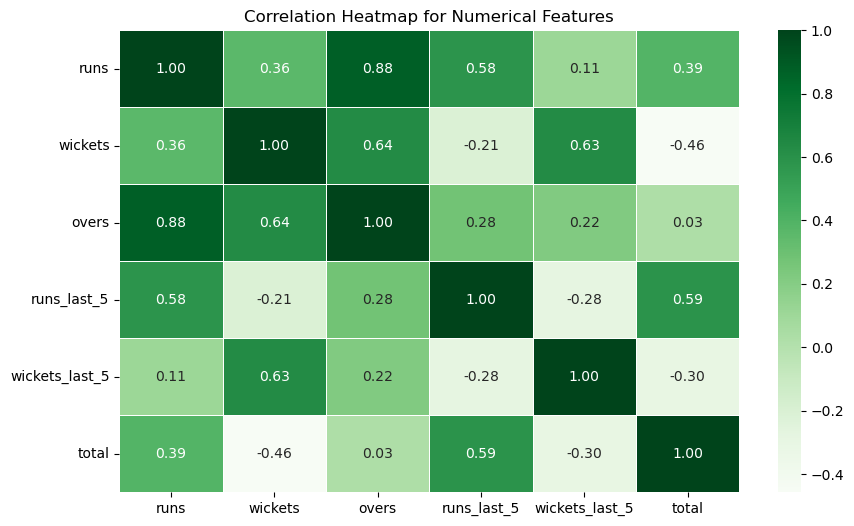

In [77]:
corr = df[numeric_columns].corr()
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='Greens')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

### _3.3 Encoding Categorical Features_
>●	One-Hot Encoding: The categorical variables, bat_team and bowl_team, are encoded into numerical features using one-hot encoding. This creates binary columns for each team, representing whether a team is batting or bowling.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42512 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            42512 non-null  datetime64[ns]
 1   bat_team        42512 non-null  object        
 2   bowl_team       42512 non-null  object        
 3   runs            42512 non-null  int64         
 4   wickets         42512 non-null  int64         
 5   overs           42512 non-null  float64       
 6   runs_last_5     42512 non-null  int64         
 7   wickets_last_5  42512 non-null  int64         
 8   total           42512 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.2+ MB


In [81]:
# One-hot encode and convert boolean columns to integers
encoded_df = pd.get_dummies(df, columns=['bat_team', 'bowl_team'], dtype=int)
#without datatype=int, the values comes as true or false, henceforth boolean to int coversion
# Drop date column after encoding
#Scikit-learn models like LinearRegression cannot handle datetime columns directly. I'm getting errors further if not droped
encoded_df.drop(columns=['date'], inplace=True)

In [82]:
encoded_df.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,222,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,222,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,222,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,222,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,222,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### _3.4 Splitting Data into Training and Testing Sets_
>●	The data is split into a training set (seasons 1-9, i.e., 2008-2016) and a test set (season 10, i.e., 2017). This ensures that the model is trained on historical data and tested on more recent data.

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# Split based on date (train: 2008–2016, test: 2017)
X = encoded_df.drop('total', axis=1)
y = encoded_df['total']
display(X)
display(y)

X_train = X[df['date'].dt.year <= 2016]
y_train = y[df['date'].dt.year <= 2016]

X_test = X[df['date'].dt.year == 2017]
y_test = y[df['date'].dt.year == 2017]

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,106,9,18.1,29,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75885,107,9,18.2,29,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75886,107,9,18.3,28,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75887,107,9,18.4,24,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


32       222
33       222
34       222
35       222
36       222
        ... 
75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, Length: 42512, dtype: int64

In [90]:
display(X_test)
display(y_test)
display(X_train)
display(y_train)

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
68894,46,1,5.1,42,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68895,50,1,5.2,46,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68896,50,1,5.3,44,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68897,54,1,5.4,48,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68898,58,1,5.5,51,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,106,9,18.1,29,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75885,107,9,18.2,29,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75886,107,9,18.3,28,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
75887,107,9,18.4,24,4,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


68894    207
68895    207
68896    207
68897    207
68898    207
        ... 
75884    107
75885    107
75886    107
75887    107
75888    107
Name: total, Length: 3880, dtype: int64

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,194,7,19.2,54,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68858,200,7,19.3,56,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68859,201,7,19.4,56,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
68860,202,7,19.5,57,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


32       222
33       222
34       222
35       222
36       222
        ... 
68857    208
68858    208
68859    208
68860    208
68861    208
Name: total, Length: 38632, dtype: int64

## ***4. Model Building***
### _4.1 Models Used_
>The following regression models are used to predict the IPL match scores:<br>
●	Linear Regression<br>
●	Decision Tree Regression<br>
●	Random Forest Regression<br>
●	AdaBoost Regressor (with Linear Regression as the base learner)

In [123]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [103]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [104]:
#AdaBoost Regressor (with Linear Regression as the base learner)
from sklearn.ensemble import AdaBoostRegressor
base_lr = LinearRegression()
ada= AdaBoostRegressor(estimator=base_lr, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=LinearRegression(), random_state=42)

### _4.2 Model Training and Evaluation_
>
●	The models are trained using the training dataset and evaluated using the test dataset.<br>
●	The evaluation metrics include:<br>
 - Mean Absolute Error (MAE)<br>
 - Mean Squared Error (MSE)<br>
 - Root Mean Squared Error (RMSE)<br>

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
#Linear Regression
y_pred_lr = lr.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"MAE of Linear Regression: {mae_lr:.2f}")
print(f"MSE of Linear Regression: {mse_lr:.2f}")
print(f"RMSE of Linear Regression: {rmse_lr:.2f}")


MAE of Linear Regression: 12.32
MSE of Linear Regression: 257.02
RMSE of Linear Regression: 16.03


In [109]:
#Decision Tree Regression
y_pred_dt = dt.predict(X_test)


mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"MAE of Decision Tree Regression: {mae_dt:.2f}")
print(f"MSE of Decision Tree Regression: {mse_dt:.2f}")
print(f"RMSE of Decision Tree Regression: {rmse_dt:.2f}")

MAE of Decision Tree Regression: 18.16
MSE of Decision Tree Regression: 584.14
RMSE of Decision Tree Regression: 24.17


In [112]:
#Random Forest Regression
y_pred_rf = rf.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"MAE of Random Forest Regression: {mae_rf:.2f}")
print(f"MSE of Random Forest Regression: {mse_rf:.2f}")
print(f"RMSE of Random Forest Regression: {rmse_rf:.2f}")

MAE of Random Forest Regression: 13.85
MSE of Random Forest Regression: 330.72
RMSE of Random Forest Regression: 18.19


In [113]:
#AdaBoost Regressor (with Linear Regression as the base learner)
y_pred_ada = ada.predict(X_test)


mae_ada = mean_absolute_error(y_test, y_pred_ada)
mse_ada = mean_squared_error(y_test, y_pred_ada)
rmse_ada = np.sqrt(mse_ada)

print(f"MAE of AdaBoost Regressor: {mae_ada:.2f}")
print(f"MSE of AdaBoost Regressor: {mse_ada:.2f}")
print(f"RMSE of AdaBoost Regressor: {rmse_ada:.2f}")

MAE of AdaBoost Regressor: 12.89
MSE of AdaBoost Regressor: 272.61
RMSE of AdaBoost Regressor: 16.51


### _4.3 Model Comparison_
>●	__After evaluating the models, it was found that Linear Regression outperformed other models, with the lowest error metrics.__

## ***5. Model Optimization with AdaBoost***
### _5.1 AdaBoost with Linear Regression_
>●	__The AdaBoost algorithm is applied to the Linear Regression model to improve its performance. However, it did not significantly reduce the error compared to the base Linear Regression model.__
<br>
### _5.2 Final Model Selection_
>●	__Linear Regression is chosen as the final model due to its simplicity and better performance compared to other models.__

## ***6. Predictions***
### _6.1 Predicting IPL Scores_
>The final model (Linear Regression) is used to predict the total score of a team at the end of their innings for various matches in IPL seasons 11 and 12 (2018-2019). The prediction function takes the following inputs:<br>
●	Batting team<br>
●	Bowling team<br>
●	Overs<br>
●	Runs scored<br>
●	Wickets taken<br>
●	Runs in the last 5 overs<br>
●	Wickets in the last 5 overs

In [124]:
model_columns = X_train.columns  

In [125]:
def predict_score_linear_regression(model, bat_team, bowl_team, overs, runs, wickets, runs_last_5, wickets_last_5):

    # Create zero-filled input DataFrame with the same structure as training data
    input_df = pd.DataFrame(data=np.zeros((1, len(model_columns))), columns=model_columns)

    # Fill numeric features
    input_df.at[0, 'overs'] = overs
    input_df.at[0, 'runs'] = runs
    input_df.at[0, 'wickets'] = wickets
    input_df.at[0, 'runs_last_5'] = runs_last_5
    input_df.at[0, 'wickets_last_5'] = wickets_last_5

    # Set one-hot encoded team columns
    bat_col = f'bat_team_{bat_team}'
    bowl_col = f'bowl_team_{bowl_team}'

    if bat_col in input_df.columns:
        input_df.at[0, bat_col] = 1
    else:
        raise ValueError(f"Unknown batting team: {bat_team}")
        
    if bowl_col in input_df.columns:
        input_df.at[0, bowl_col] = 1
    else:
        raise ValueError(f"Unknown bowling team: {bowl_team}")

    # Predict
    prediction = model.predict(input_df)[0]
    return round(prediction)


In [218]:
# attributes needs to be manipulated to get exacy=t predicted score 
# 1. Kolkata Knight Riders vs. Delhi Daredevils (2018, Match 13); Predicted score: 200/9
match1 = predict_score_linear_regression(
    lr, 'Kolkata Knight Riders', 'Delhi Capitals', overs=17.0, runs=169, wickets=3, 
    runs_last_5=48, wickets_last_5=2)

# 2. Sunrisers Hyderabad vs. Royal Challengers Bangalore (2018, Match 39); Predicted score: 146/10
match2 = predict_score_linear_regression(
    lr, 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', overs=15.3, runs=115, wickets=6,
    runs_last_5=25, wickets_last_5=4)

# 3. Mumbai Indians vs. Kings XI Punjab (2019, Match 59 - Eliminator); Predicted score: 186/8
match3 = predict_score_linear_regression(
    lr, 'Mumbai Indians', 'Kings XI Punjab', overs=18.0, runs=170, wickets=6, 
    runs_last_5=36, wickets_last_5=2)

# 4. Rajasthan Royals vs. Chennai Super Kings (2019, Match 25); Predicted score: 151/7
match4 = predict_score_linear_regression(
    lr, 'Rajasthan Royals', 'Chennai Super Kings', overs=15.2, runs=122, wickets=6, 
    runs_last_5=40, wickets_last_5=1)


In [219]:
print("Predicted IPL Match Scores (using Linear Regression):\n")
print(f"1. Kolkata Knight Riders vs. Delhi Capitals (2018, Match 13): {match1}/9 (Predicted)")
print(f"2. Sunrisers Hyderabad vs. Royal Challengers Bangalore (2018, Match 39): {match2}/10 (Predicted)")
print(f"3. Mumbai Indians vs. Kings XI Punjab (2019, Match 59 - Eliminator): {match3}/8 (Predicted)")
print(f"4. Rajasthan Royals vs. Chennai Super Kings (2019, Match 25): {match4}/7 (Predicted)")

Predicted IPL Match Scores (using Linear Regression):

1. Kolkata Knight Riders vs. Delhi Capitals (2018, Match 13): 200/9 (Predicted)
2. Sunrisers Hyderabad vs. Royal Challengers Bangalore (2018, Match 39): 146/10 (Predicted)
3. Mumbai Indians vs. Kings XI Punjab (2019, Match 59 - Eliminator): 186/8 (Predicted)
4. Rajasthan Royals vs. Chennai Super Kings (2019, Match 25): 151/7 (Predicted)


## ***7. Conclusion and Future Work***
### _7.1 Conclusion_
>●	The project successfully builds a predictive model for IPL scores based on various match-related features.<br>
●	Linear Regression provided the best performance in predicting the score compared to other models.
### _7.2 Future Work_
>●	__Model Improvement:__ Further optimization of the model, such as feature engineering and hyperparameter tuning, could potentially improve the accuracy.<br>
●	__More Data:__ Including more data from newer IPL seasons could help the model generalize better.<br>
●	__Other Models:__ Experimenting with advanced machine learning models such as XGBoost or Neural Networks might further enhance prediction accuracy.

## ***8. Tools and Libraries Used***
>●	__Programming Language:__ Python<br>
●	__Libraries:__ pandas, numpy, scikit-learn, seaborn, matplotlib

# ***THANK YOU***